# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


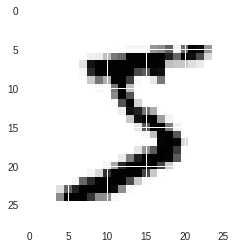

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1),name='layer1'))
model.add(Convolution2D(64, 3, activation='relu'))
model.add(Convolution2D(128, 3, activation='relu'))
model.add(Convolution2D(256, 3, activation='relu'))
model.add(Convolution2D(512, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Convolution2D(32, 1, activation='relu'))
model.add(Convolution2D(64, 3, activation='relu'))
model.add(Convolution2D(128, 3, activation='relu'))
model.add(Convolution2D(256, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 20, 20, 256)       295168    
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 18, 18, 512)       1180160   
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 9, 9, 512)         0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 9, 9, 32)          16416     
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=1000, nb_epoch=25, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/25
60000/60000 [==============================] - 60s 1ms/step - loss: 0.9672 - acc: 0.6762
Epoch 2/25
60000/60000 [==============================] - 57s 957us/step - loss: 0.1585 - acc: 0.9529
Epoch 3/25
60000/60000 [==============================] - 57s 956us/step - loss: 0.0846 - acc: 0.9749
Epoch 4/25
60000/60000 [==============================] - 57s 955us/step - loss: 0.0642 - acc: 0.9806
Epoch 5/25
60000/60000 [==============================] - 57s 953us/step - loss: 0.0430 - acc: 0.9866
Epoch 6/25
60000/60000 [==============================] - 57s 952us/step - loss: 0.0338 - acc: 0.9892
Epoch 7/25
60000/60000 [==============================] - 57s 952us/step - loss: 0.0286 - acc: 0.9910
Epoch 8/25
60000/60000 [==============================] - 57s 950us/step - loss: 0.0234 - acc: 0.9928
Epoch 9/25
60000/60000 [==============================] - 57s 949us/step - loss: 0.0218 - acc: 0.9927
Epoch 10/25
60000/60000 [==============================] - 57s 947us/step - loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.03696510653876785, 0.9916]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.39754528e-08 1.06657820e-08 8.16584245e-10 9.06682715e-07
  5.30852973e-10 1.48554835e-10 1.79623501e-14 9.99998927e-01
  1.64774683e-09 8.86229046e-08]
 [2.02086986e-10 3.68408581e-10 1.00000000e+00 2.52956107e-14
  1.07974509e-15 2.06396981e-17 4.26288089e-08 5.66273677e-12
  7.09195784e-15 3.74175641e-19]
 [7.86166340e-11 9.99980688e-01 2.65534936e-06 2.38499123e-08
  2.17881553e-08 1.35987548e-05 2.32670438e-09 2.38015605e-06
  6.74903163e-07 4.55113192e-09]
 [9.99097109e-01 1.82970348e-14 2.00319628e-09 3.22020965e-10
  1.32895106e-12 3.28676635e-11 9.02912347e-04 1.90100106e-11
  9.24474455e-11 5.52083622e-11]
 [1.16826416e-12 3.16287135e-10 4.51252073e-13 7.94806441e-13
  9.99999881e-01 5.40112422e-15 2.30997688e-09 1.64338243e-09
  1.29153612e-08 1.19058676e-07]
 [1.00867342e-10 9.99979854e-01 1.65174642e-05 5.63382119e-10
  6.50555521e-08 1.68633150e-07 9.71931069e-09 2.96678058e-06
  3.86210957e-07 1.77816606e-09]
 [3.83978670e-15 2.52942245e-09 1.32978212e-11 5.13166809e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

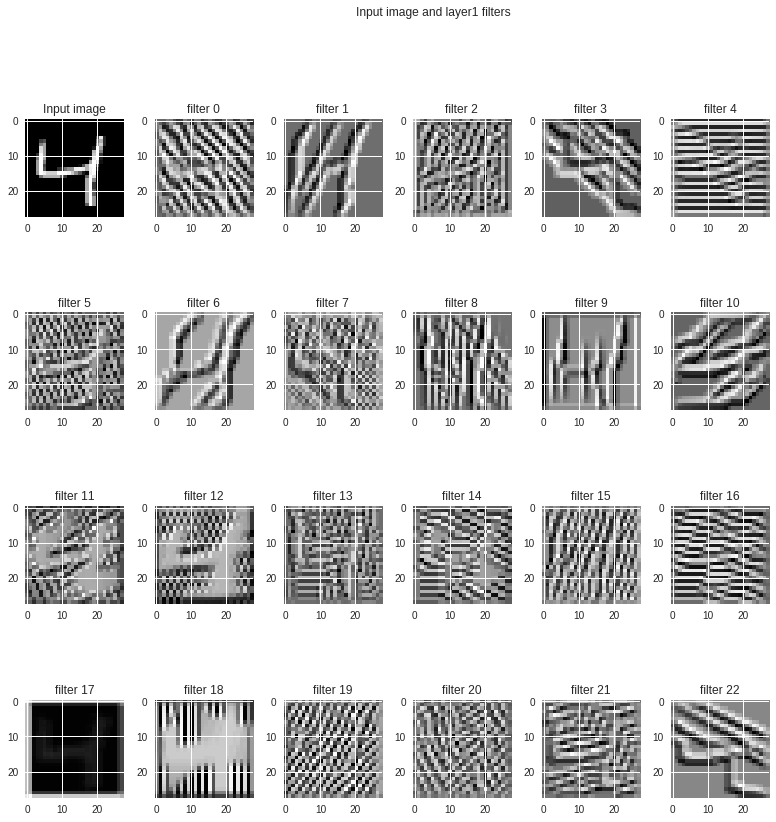

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'layer1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()